In [1]:
import numpy as np
import nibabel as nib

img_nifti = nib.load('/home/navid/Documents/Epilep_PC/OptiBET/45.nii.gz')
img = img_nifti.get_fdata()

ValueError: too many values to unpack (expected 3)

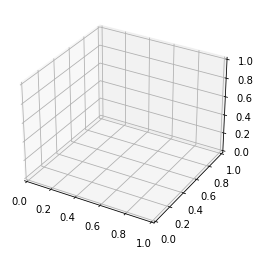

In [3]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# data = np.random.random(size=(3, 3, 3))
z, x, y = img
# z, x, y = img.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

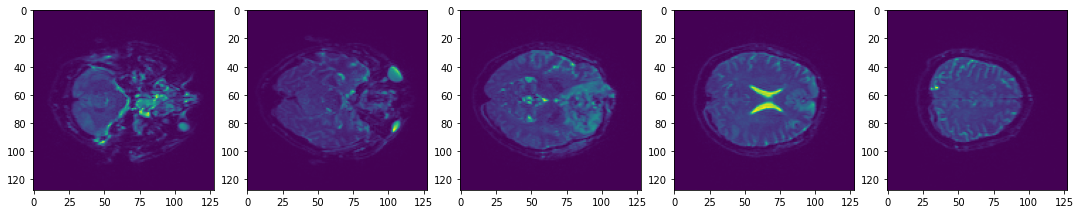

In [8]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(img[:,:,15 + i*10])
    plt.gcf().set_size_inches(15, 15)
plt.show()

In [9]:
img.shape

(128, 128, 70)

In [ ]:
#!/usr/bin/env python
import numpy as np
from MMIDimReduction import MMINet
import matplotlib.pyplot as plt


# An illustrative example with two-dimensional data from two classes
x_c1 = np.random.multivariate_normal([-6, 5], [[25, 45], [45, 90]], 200)
x_c2 = np.random.multivariate_normal([5, -7], [[25, 45], [45, 90]], 200)
x_train = np.concatenate((x_c1, x_c2), axis=0)
y_train = np.concatenate((np.zeros(shape=(200, 1), dtype='int64'),
                          np.ones(shape=(200, 1), dtype='int64')))

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


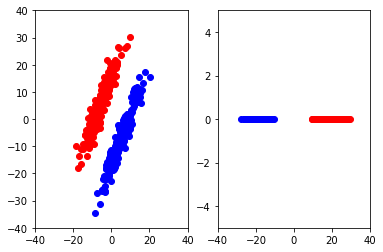

In [1]:
# Project two-dimensional input features into a single dimension
model = MMINet(input_dim=2, output_dim=1, net='linear')
model.learn(x_train, y_train, num_epochs=10)
z_train = model.reduce(x_train)

# Plot results
plt.subplot(1, 2, 1)
plt.scatter(x_train[y_train[:, 0] == 0, 0], x_train[y_train[:, 0] == 0, 1], c='r')
plt.scatter(x_train[y_train[:, 0] == 1, 0], x_train[y_train[:, 0] == 1, 1], c='b')
plt.axis([-40, 40, -40, 40])
plt.subplot(1, 2, 2)
plt.scatter(z_train[y_train[:, 0] == 0, 0], np.zeros((200, 1)), c='r')
plt.scatter(z_train[y_train[:, 0] == 1, 0], np.zeros((200, 1)), c='b')
plt.axis([-40, 40, -5, 5])
plt.show()

In [2]:
# Project two-dimensional input features into a single dimension
model = MMINet(input_dim=2, output_dim=1, net='nonlinear')
model.learn(x_train, y_train, num_epochs=10)
z_train = model.reduce(x_train)

# Plot results
plt.subplot(1, 2, 1)
plt.scatter(x_train[y_train[:, 0] == 0, 0], x_train[y_train[:, 0] == 0, 1], c='r')
plt.scatter(x_train[y_train[:, 0] == 1, 0], x_train[y_train[:, 0] == 1, 1], c='b')
plt.axis([-40, 40, -40, 40])
plt.subplot(1, 2, 2)
plt.scatter(z_train[y_train[:, 0] == 0, 0], np.zeros((200, 1)), c='r')
plt.scatter(z_train[y_train[:, 0] == 1, 0], np.zeros((200, 1)), c='b')
plt.axis([-40, 40, -5, 5])
plt.show()

ZeroDivisionError: float division by zero